In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('./input/myshot_img/S2.jpg') # Read the test img

IMAGE_H ,IMAGE_W = img.shape

src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

img = cv2.imread('./test_img.jpg') # Read the test img
img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
plt.show()

ValueError: too many values to unpack (expected 2)

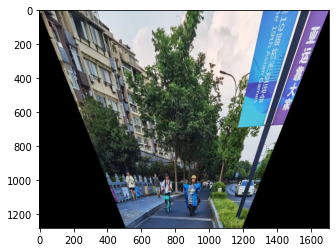

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./input/myshot_img/S2.jpg')

# Get the image dimensions
IMAGE_H, IMAGE_W, _ = img.shape

# Define source and destination points for the transformation
src = np.float32([[0, IMAGE_H], [IMAGE_W, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[int(0.3*IMAGE_W), IMAGE_H], [int(0.7*IMAGE_W), IMAGE_H], [0, 0], [IMAGE_W, 0]])

# Calculate transformation and inverse transformation matrices
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

# Apply the transformation to the image
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H))

# Display the result
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.show()


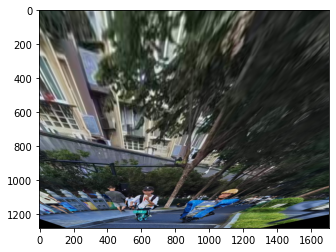

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./input/myshot_img/S2.jpg')

# Get the image dimensions
IMAGE_H, IMAGE_W, _ = img.shape

# Define source points - choose 4 points in original image which constitute a rectangle
src = np.float32([[200, IMAGE_H], [1100, IMAGE_H], [685, 450], [595, 450]])

# Define desired destination points (the perspective transformed rectangle)
dst = np.float32([[300, IMAGE_H], [900, IMAGE_H], [900, 0], [300, 0]])

# Calculate transformation and inverse transformation matrices
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)

# Apply the transformation to the image
warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H))

# Display the result
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.show()


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from models import MonodepthModel, BEVTransformer  #需要引入或实现这些模型

#加载模型
depth_model = MonodepthModel('path_to_weights')
bev_transformer = BEVTransformer('path_to_weights')

#加载图像
image = cv2.imread('./input/myshot_img/S2.jpg')

#通过模型预测深度图
depth_map = depth_model.predict(image)

#将深度图转换为鸟瞰视图
bev_map = bev_transformer.transform(depth_map)

#显示结果
plt.imshow(bev_map)
plt.show()


ModuleNotFoundError: No module named 'models'